In [3]:
import pandas as pd
import os
import pickle


data = pd.read_csv("../../train.csv")
titles = data['title'].tolist()

In [4]:
import textfeatures
def extract_title_features(df_prep):
    '''Extracts features from the unprocessed title column.'''
    
    # Extract Features
    df_prep = textfeatures.word_count(df_prep, "title", "word_count")
    df_prep = textfeatures.char_count(df_prep, "title", "char_count")
    df_prep = textfeatures.avg_word_length(df_prep, "title", "avg_word_length")
    df_prep = textfeatures.stopwords_count(df_prep, "title", "stopwords_count")
    df_prep = textfeatures.numerics_count(df_prep, "title", "numerics_count")
    
    return df_prep

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


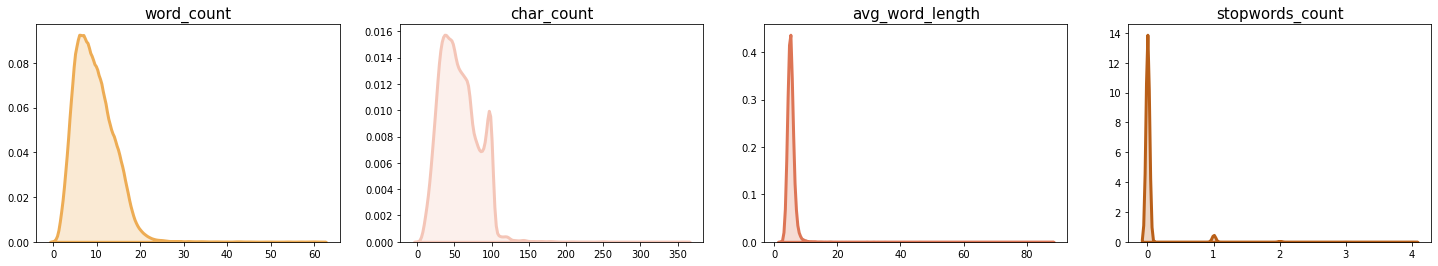

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

my_colors = ["#EDAC54", "#F4C5B7", "#DD7555", "#B95F18", "#475A20"]

train_df_prep = extract_title_features(df_prep=data)
title_features = ['word_count', 'char_count', 'avg_word_length',
                  'stopwords_count']

# Plot
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25, 4), squeeze=False)
# plt.suptitle(f"Title : Features Extracted", fontsize=20)
rows = [0, 0, 0, 0]
cols = [0, 1, 2, 3]
# axs[1,2].set_visible(False)

for k, (name, i, j) in enumerate(zip(title_features, rows, cols)):
    sns.kdeplot(train_df_prep[name], ax=axs[i, j], color=my_colors[k],
                shade="fill", lw=3)
    axs[i, j].set_title(name, fontsize=15)
    axs[i, j].set_xlabel("", fontsize=16)
    axs[i, j].set_ylabel("", fontsize=16)


fig.savefig('count.eps',dpi=600,format='eps')

In [6]:
def load_corpus():
    aux_file = os.path.join("../../tok_corpus.pickle")
    if not os.path.exists(aux_file):
        print("building corpus matrix from raw data...")
        corpus = build_corpus(args.data_dir)
        if not os.path.exists(args.cache_dir):
            os.mkdir(args.cache_dir)
        with open(aux_file, "wb") as f:
            pickle.dump(corpus, f)
        print("building corpus over.")
    else:
        print("load weights matrix from cached file: ", aux_file)
        with open(aux_file, "rb") as f:
            corpus = pickle.load(f)
        print("load over.")
    return corpus

In [7]:
corpus = load_corpus()

load weights matrix from cached file:  ../../tok_corpus.pickle
load over.


In [8]:
df_prep = pd.DataFrame({"title": [' '.join(item) for item in corpus]})

In [20]:
data = pd.read_csv("../../train.csv")
data['std_titles'] = [' '.join(item) for item in corpus]
data.to_csv("../../std_train.csv", index=False)

0                            Paper Bag Victoria Secret
1    Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...
Name: title, dtype: object

In [9]:
import numpy as np
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot\n",
    h_v: weather or not the barplot is vertical/ horizontal
    '''
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

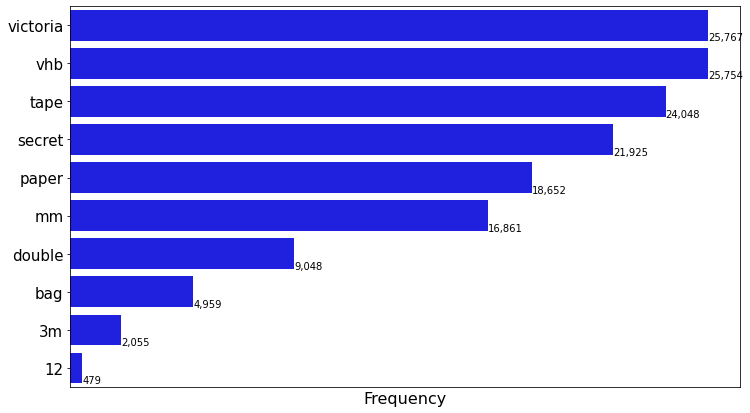

In [29]:
# Get bag of words from the title
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

title_prep = df_prep["title"].values.astype('U')
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(title_prep)

bag_of_words = pd.DataFrame({'word' : vectorizer.vocabulary_.keys(),
                             'freq' : vectorizer.vocabulary_.values()})

# Plot
plt.figure(figsize=(12, 7))
plot = sns.barplot(data=bag_of_words.head(10).sort_values('freq', ascending=False),
                   y="word", x="freq", color="blue")
show_values_on_bars(plot, h_v="h", space=0.3)
# plt.title("Example of words & frequencies", fontsize=20)
plt.yticks(fontsize=15)
plt.xticks([],)
plt.xlabel("Frequency", fontsize=16)
plt.ylabel("", fontsize=16)

plt.savefig('freq.eps',dpi=600,format='eps')

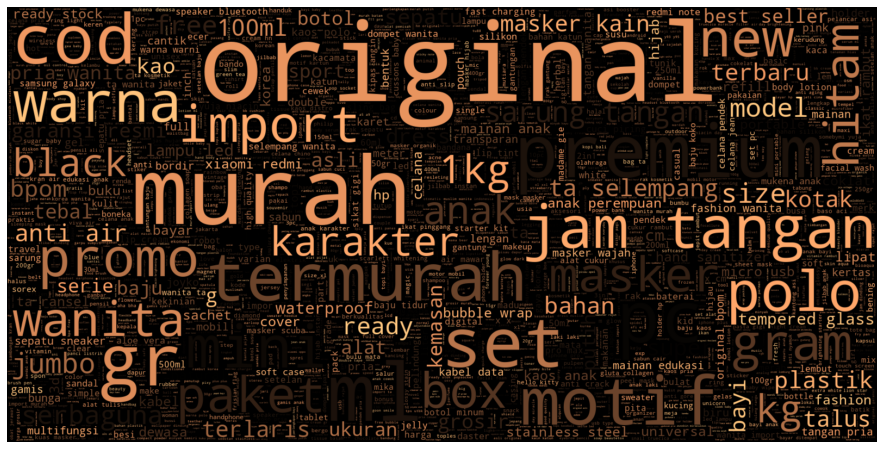

In [68]:
from wordcloud import STOPWORDS as stopwords_wc
from wordcloud import WordCloud, ImageColorGenerator

# Get all titles
text_for_wc = " ".join(title for title in df_prep["title"])

# Wordcloud
# font_path = "../input/shopee-preprocessed-data/ACETONE.otf"
stopwords_wc = set(stopwords_wc)
# stopwords_wc.update(["yes"])

wordcloud = WordCloud(stopwords=stopwords_wc, 
                      max_words=4000,
                      max_font_size=200, random_state=42,
                      width=1600, height=800,
                      colormap = "copper")
wordcloud.generate(text_for_wc)

# Plot
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.eps',dpi=200,format='eps')
plt.show()

In [14]:
df_prep.columns

Index(['title'], dtype='object')

In [10]:
# Get count of values on each group
train_df=data
groups_df = train_df["label_group"].value_counts().reset_index()
groups_df.columns = ["group", "count"]

# Print info
print("No. of unique groups: {:,}".format(len(groups_df)), "\n" +
      "Max no. of apparitions in 1 group: {}".format(groups_df["count"].max()), "\n" +
      "Min no. of apparitions in 1 group: {}".format(groups_df["count"].min()))

No. of unique groups: 11,014 
Max no. of apparitions in 1 group: 51 
Min no. of apparitions in 1 group: 2


In [ ]:
a=groups_df.iloc[:10]["group"].to_numpy()
b=groups_df.iloc[:10]["count"].to_numpy()
a,b

In [ ]:
#Plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 8))
# plt.bar(groups_df.iloc[:10]["group"].to_numpy(), groups_df.iloc[:10]["count"].to_numpy(), facecolor = 'lightskyblue', edgecolor = 'white')
plt.bar(a, b, facecolor = 'lightskyblue', edgecolor = 'white')
plt.title("Group Count Distribution", fontsize=20)
plt.xticks([])
plt.xlabel("Group ID", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

In [31]:
# Get count of values on each group
train_df=data
groups_df = train_df["label_group"].value_counts().reset_index()
groups_df.columns = ["group", "count"]

# Print info
print("No. of unique groups: {:,}".format(len(groups_df)), "\n" +
      "Max no. of apparitions in 1 group: {}".format(groups_df["count"].max()), "\n" +
      "Min no. of apparitions in 1 group: {}".format(groups_df["count"].min()))

No. of unique groups: 11,014 
Max no. of apparitions in 1 group: 51 
Min no. of apparitions in 1 group: 2


In [41]:
# a=[str(item) for item in groups_df["group"].to_numpy()]
b=groups_df["count"].to_numpy()
np.sum(b), np.sum(b[b>5])

(34250, 9167)

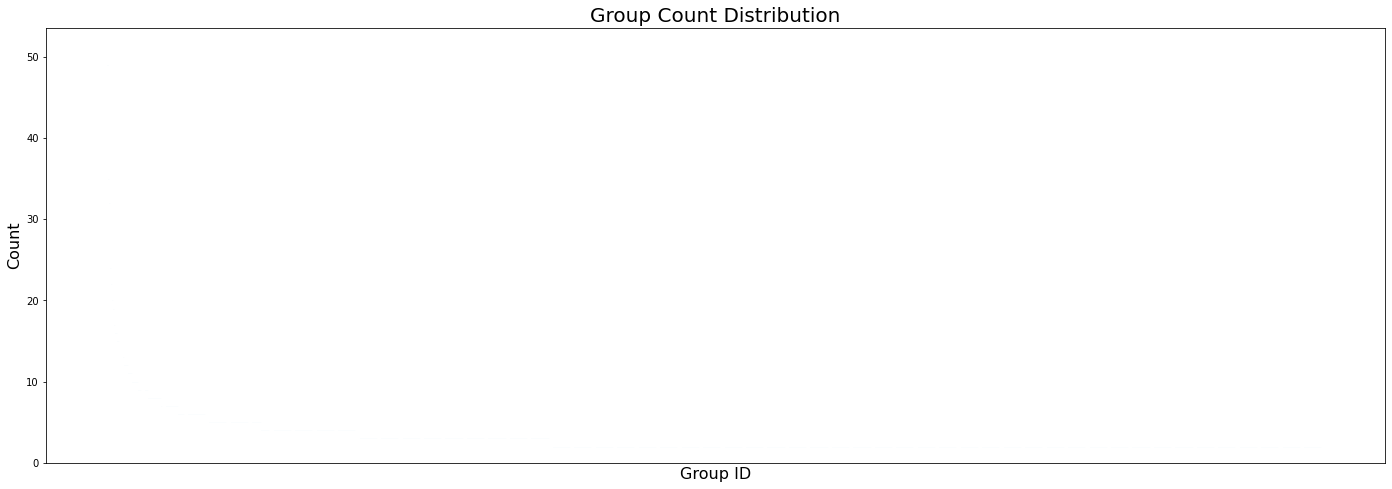

In [23]:
#Plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 8))
# plt.bar(groups_df.iloc[:10]["group"].to_numpy(), groups_df.iloc[:10]["count"].to_numpy(), facecolor = 'lightskyblue', edgecolor = 'white')
plt.bar(a, b, facecolor = 'lightskyblue', edgecolor = 'white')
plt.title("Group Count Distribution", fontsize=20)
plt.xticks([])
plt.xlabel("Group ID", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.savefig('../../image4paper/label_count.eps',dpi=200,format='eps')
plt.show()

In [73]:
# Get the count of apparitions per image
image_count = train_df["image"].value_counts().reset_index()
image_count.columns = ["image", "count"]
image_count_duplicates = image_count[image_count["count"] > 1]
print("Total no. of images with duplicates: {:,}".format(len(image_count_duplicates)))

Total no. of images with duplicates: 1,246


In [ ]:
image_count[image_count["count"] == 15]

In [ ]:
train_df[train_df['image']=="0cca4afba97e106abd0843ce72881ca4.jpg"]

In [96]:
#Plot
fig, ax = plt.subplots(figsize=(16, 7))
plt.bar(x=image_count_duplicates.iloc[::16]["image"],
        height=image_count_duplicates.iloc[::16]["count"],
        facecolor = 'yellowgreen', edgecolor = 'white')
plt.title("Duplicated Images: How many apparitions?", fontsize=20)
plt.xticks([])
plt.xlabel("Image ID", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.savefig('../../image4paper/duplicate.eps',dpi=200,format='eps')
plt.show()

,image,count
0,0cca4afba97e106abd0843ce72881ca4.jpg,15


In [97]:
train_df[train_df['image']=="0cca4afba97e106abd0843ce72881ca4.jpg"]

,posting_id,image,image_phash,title,label_group,word_count,char_count,avg_word_length,stopwords_count,numerics_count
1651,train_3068759534,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,BUBBLE PACK UNTUK PACKING TAMBAHAN 1BUBBLE UNT...,4198148727,8,52,5.625000,0,0
1652,train_1049463374,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,BUBBLE WARP,2403374241,2,11,5.000000,0,0
1653,train_2420615645,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,BUBBLE WRAP - EXTRA PACKING UNTUK BARANG ANDA,4198148727,8,45,4.750000,0,0
1654,train_1236710293,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,Bubble Warp Pengaman Pengiriman,4198148727,4,31,7.000000,0,0
1655,train_443869273,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,Bubble Wrap,4198148727,2,11,5.000000,0,0
1656,train_1381575164,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,Bubble Wrap untuk ekstra packaging,4198148727,5,34,6.000000,0,0
1657,train_2085280992,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,Buble Wrap,4198148727,2,10,4.500000,0,0
1658,train_4226152332,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,EXTRA BUBBLE WRAP UNTUK PACKING,2403374241,5,31,5.400000,0,0
1659,train_1437764574,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,Extra Bubble Wrap,4198148727,3,17,5.000000,0,0
1660,train_3993385953,0cca4afba97e106abd0843ce72881ca4.jpg,d0c0ea37bd9acce0,Extra Bubble Wrap Pengaman Packingan,2403374241,5,36,6.400000,0,0


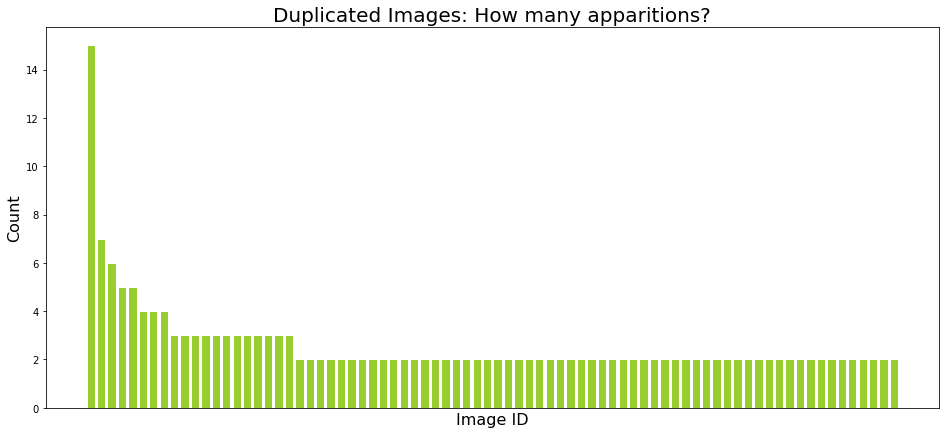

In [76]:
#Plot
fig, ax = plt.subplots(figsize=(16, 7))
plt.bar(x=image_count_duplicates.iloc[::16]["image"],
        height=image_count_duplicates.iloc[::16]["count"],
        facecolor = 'yellowgreen', edgecolor = 'white')
plt.title("Duplicated Images: How many apparitions?", fontsize=20)
plt.xticks([])
plt.xlabel("Image ID", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.savefig('../../image4paper/duplicate.eps',dpi=200,format='eps')
plt.show()

In [7]:
from bertviz import head_view
from transformers import XLMTokenizer, XLMModel

In [8]:
model_version = 'xlm-mlm-ende-1024'
model = XLMModel.from_pretrained(model_version, output_attentions=True)
tokenizer = XLMTokenizer.from_pretrained(model_version)

text = "Do you speak German? Ja, ich spreche Deutsch."
inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True)
input_ids = inputs['input_ids']
attention = model(input_ids)[-1]
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)
head_view(attention, tokens)


Some weights of the model checkpoint at xlm-mlm-ende-1024 were not used when initializing XLMModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing XLMModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<IPython.core.display.Javascript object>